In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv("/content/titanic_toy.csv" )
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [96]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [97]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [99]:
X_train["Age 99"] = X_train["Age"].fillna(99)
X_train["Age_minus1"] = X_train["Age"].fillna(-1)

X_train["Fare_99"] = X_train["Fare"].fillna(99)
X_train["Fare_minus1"] = X_train["Fare"].fillna(-1)

In [101]:
## Variance

print("Original Age Variance: ", X_train["Age"].var())
print("Age Variance After -1: ",X_train["Age_minus1"].var())
print("Age Variance After 99:" , X_train["Age 99"].var())

print("Original Fare Variance: ", X_train["Fare"].var())
print("Fare Variance After -1: ",X_train["Fare_minus1"].var())
print("Fare Variance After 99:" , X_train["Fare_99"].var())


Original Age Variance:  210.2517072477438
Age Variance After -1:  315.99550362600644
Age Variance After 99: 932.9665366701436
Original Fare Variance:  2761.031434948639
Fare Variance After -1:  2675.2394049177087
Fare Variance After 99: 2833.708690936757


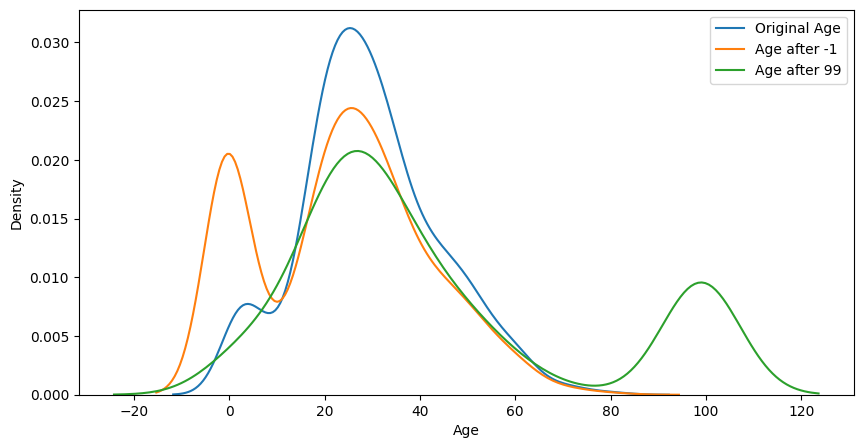

In [102]:
plt.figure(figsize = (10,5))

## Original Age
sns.kdeplot(X_train["Age"], label = "Original Age")
## Age after adding -1
sns.kdeplot(X_train["Age_minus1"] , label = "Age after -1")
## Age after adding 99
sns.kdeplot(X_train["Age 99"] , label = "Age after 99")

plt.legend()
plt.show()

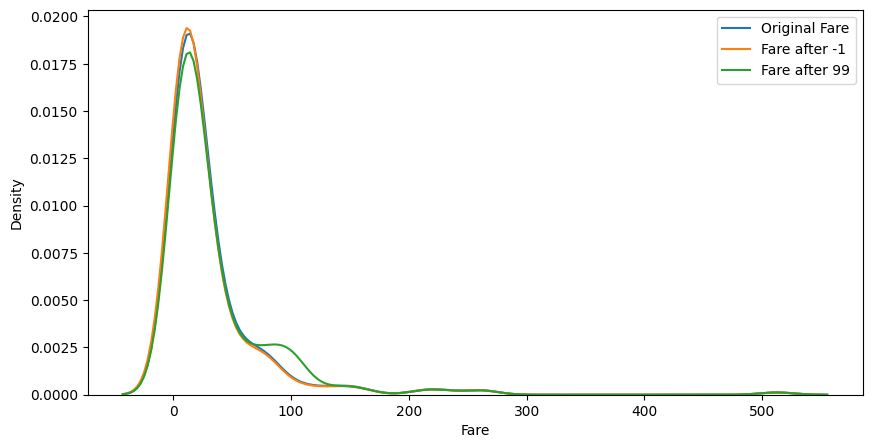

In [103]:
plt.figure(figsize = (10,5))

## Original Fare
sns.kdeplot(X_train["Fare"], label = "Original Fare")
## Fare after adding -1
sns.kdeplot(X_train["Fare_minus1"] , label = "Fare after -1")
## Fare after adding 99
sns.kdeplot(X_train["Fare_99"] , label = "Fare after 99")

plt.legend()
plt.show()

In [104]:
X_train.corr()

,Age,Fare,Family,Age 99,Age_minus1,Fare_99,Fare_minus1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.091016,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.196548,0.203212
Age 99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.071667,-0.064017
Age_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.145956,0.135159
Fare_99,0.091016,1.000000,0.196548,-0.071667,0.145956,1.000000,0.913115
Fare_minus1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.913115,1.000000


In [105]:
X_train.cov()

,Age,Fare,Family,Age 99,Age_minus1,Fare_99,Fare_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,75.273024,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,17.603852,17.684447
Age 99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-116.528480,-101.137070
Age_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,138.114503,124.270305
Fare_99,75.273024,2761.031435,17.603852,-116.528480,138.114503,2833.708691,2514.109946
Fare_minus1,69.137162,2761.031435,17.684447,-101.137070,124.270305,2514.109946,2675.239405


# **Using Sklearn**

In [106]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [107]:
imputer1  = SimpleImputer(strategy = "constant" , fill_value= -1)
imputer2 = SimpleImputer(strategy = "constant" , fill_value= 99)

In [108]:
trf = ColumnTransformer(
    transformers = [
        ("imputer1" , imputer1 , ["Age"]),
        ("imputer2" , imputer2 , ["Fare"])
    ] ,
    remainder = "passthrough"
)

In [109]:
trf.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Fare'])])

In [110]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [113]:
trf.named_transformers_["imputer1"].statistics_

array([-1.])

In [114]:
trf.named_transformers_["imputer2"].statistics_

array([99.])